## 소상공인시장진흥공단 상가업소정보로 스타벅스, 이디야 위치 분석하기

* 이디야는 스타벅스 근처에 입점한다는 설이 있습니다. 과연 이디야와 스타벅스의 매장입지는 얼마나 차이가 날까요? 관련 기사를 읽고 구별로 이디야와 스타벅스의 매장을 기사와 유사하게 분석하고 시각화 해보면서 Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현해 봅니다..

### 다루는 내용
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기

### 실습
* 텍스트 데이터 정제하기 -  대소문자로 섞여있는 상호명을 소문자로 변경하고 상호명 추출하기
* 텍스트 데이터에서 원하는 정보 추출하기 - 브랜드명 컬럼을 만들고 구별 매장 수 분석하기
* folium을 통해 지도에 분석한 내용을 표현하기 - CircleMarker와 choropleth 그리기


### 데


In [23]:
# 데이터 분석을 위해 pandas를, 수치계산을 위해 numpy를, 시각화를 위해 seaborn을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams, style, font_manager, rc



In [24]:
font_path = 'C:/Windows/Fonts/Malgun.ttf'
font_name= font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

<AxesSubplot:title={'center':'한글폰트'}>

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


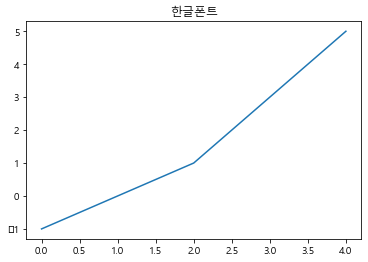

In [39]:

# 한글폰트와 마이너스 폰트 설정 확인

pd.Series([-1, 0, 1, 3, 5]).plot(title="한글폰트")

In [40]:
# 파일을 불러와 df 라는 변수에 담습니다.
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.
df = pd.read_csv('./data/shop_info.csv'), sep='|', encoding='utf-8'

df.shape

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3195519870.py, line 3)

In [26]:
df.head()  

NameError: name 'df' is not defined

In [10]:
# 정보보기  
df.info()

NameError: name 'df' is not defined

In [11]:
# 결측치 보기
df.isnull().sum().plot.barh(figsize=(10, 15))

NameError: name 'df' is not defined

In [12]:
# 사용할 컬럼만 따로 모음

columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']

df = df[columns].copy()
df.shape

NameError: name 'df' is not defined

In [13]:
# 제거 후 메모리 사용량 보기
df.info()

NameError: name 'df' is not defined

In [ ]:
# 서울만 따로 추출
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

In [15]:
df_seoul.head()

NameError: name 'df_seoul' is not defined

In [16]:

# "상호명_소문자" 컬럼을 만듭니다.
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

NameError: name 'df_seoul' is not defined

In [27]:
# ediya 를 "상호명_소문자" 컬럼으로 가져옵니다.
# '상호명_소문자'컬럼으로 '이디야|ediya' 를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]

df_seoul.loc[df_seoul["상호명_소문자"].str.contains("이디야|이디아|ediya"), "상호명_소문자"].shape

NameError: name 'df_seoul' is not defined

In [28]:
# '상호명_소문자'컬럼으로  '스타벅스|starbucks|이디야|이디아|ediya'를 가져와 df_cafe 변수에 담습니다.
df_cafe = df_seoul[
    df_seoul["상호명_소문자"].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()
df_cafe.shape

NameError: name 'df_seoul' is not defined

In [29]:
# ~은 not을 의미합니다. 스타벅스가 아닌 데이터는 이디야로 넣어주어도 되지만
# 아래 코드처럼 결측치를 이디야로 채워줘도 괜찮습니다.
# df_cafe.loc[~df_cafe['상호명'].str.contains('스타벅스|starbucks'), '브랜드명'] = '이디야'

df_cafe.loc[df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "스타벅스"
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "이디야"
df_cafe[["상호명_소문자", "브랜드명"]].head()

NameError: name 'df_cafe' is not defined

In [34]:
# 스타벅스를 제외한 데이터는 이디야이기 때문에 이디야로 브랜드명을 만듭니다.
# df_cafe["브랜드명"].fillna("이디야

In [35]:
# df_cafe에 담긴 상호명','브랜드명'으로 미리보기를 합니다.

df_cafe[["상호명", "브랜드명"]].tail()

NameError: name 'df_cafe' is not defined

In [ ]:
### 시각화
#### 분류별 countplot 그리기

In [ ]:
df_cafe.to_csv('./data/shop_info_in_cafe.csv', encoding='utf-8')


In [36]:
# "상권업중분류명"을 countplot 으로 시각화하고 분류 혹은 데이터가 잘못 색인된 데이터가 있는지 봅니다.
d
df_cafe["상권업종중분류명"].value_counts().plot.bar()

NameError: name 'df_cafe' is not defined

In [37]:
print(df_cafe.shape)
df_cafe = df_cafe[df_cafe["상권업종중분류명"] == "커피점/카페"].copy()
df_cafe.shape

NameError: name 'df_cafe' is not defined

In [38]:
# 브랜드명으로 각 카페의 갯수를 세어봅니다.

df_cafe["브랜드명"].value_counts()

NameError: name 'df_cafe' is not defined

In [41]:
# 브랜드명을 막대그래프로 그려봅니다.

sns.countplot(data=df_cafe, x="브랜드명")

NameError: name 'df_cafe' is not defined

In [42]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

NameError: name 'df_cafe' is not defined

<Figure size 1080x288 with 0 Axes>

In [43]:
# pandas로 scatterplot을 그려봅니다.
 ## 서울 지도랑 거의 동일함 

df_cafe[["위도", "경도"]].plot.scatter(x="경도", y="위도")

NameError: name 'df_cafe' is not defined

In [44]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")

NameError: name 'df_cafe' is not defined

In [45]:
# jointplot 그리기
sns.jointplot(data=df_cafe, x="경도", y="위도", kind="kde")

NameError: name 'df_cafe' is not defined

In [46]:
# 구별로 그룹핑

df_cafe_vs = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
df_cafe_vs.head()


NameError: name 'df_cafe' is not defined

In [47]:
# reset_index 로 인덱스를 컬럼으로 만듭니다.
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.head()

NameError: name 'df_cafe_vs' is not defined